*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


In [39]:
import nltk
nltk.download('punkt')

print("Kernel is alive")

Kernel is alive


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hannahzhao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text.lower())


import pickle
import numpy as np

with open('word2vec_embeddings.pkl', 'rb') as f:
    data = pickle.load(f)

embeddings = data['embeddings']
word2idx = data['word2idx']
idx2word = data['idx2word']

In [41]:
def sentence_embedding(sentence, embeddings, word2idx):
    tokens = tokenize_text(sentence)
    vectors = []

    for token in tokens:
        if token in word2idx:
            vectors.append(embeddings[word2idx[token]])

    if len(vectors) == 0:
        return None

    return np.mean(vectors, axis=0)

In [42]:
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [43]:
# List of sentences for comparison
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

# Query sentence
query = "My pet cat is sleeping on the carpet."

In [44]:
query_embedding = sentence_embedding(query, embeddings, word2idx)

for sentence in sentences:
    sent_embedding = sentence_embedding(sentence, embeddings, word2idx)
    
    if sent_embedding is not None:
        sim = cosine_similarity(query_embedding, sent_embedding)
        print(f"{sim:.4f} : {sentence}")


0.6783 : The cat sat on the mat.
0.5257 : A dog is playing in the yard.
0.4657 : I need to buy groceries today.
0.3469 : The feline was resting on the rug.
0.5105 : Canines enjoy outdoor activities.
0.4436 : My shopping list includes milk and bread.
0.3874 : The weather is beautiful today.
0.4505 : Programming requires logical thinking.


In [45]:
animals = [
    'dog', 'cat', 'horse', 'cow',
    'lion', 'tiger', 'elephant', 'giraffe',
    'eagle', 'hawk', 'sparrow', 'penguin',
    'shark', 'whale', 'dolphin', 'tuna'
]

foods = [
    'apple', 'orange', 'banana', 'grape',
    'bread', 'pasta', 'rice', 'potato',
    'chicken', 'beef', 'pork', 'fish',
    'coffee', 'tea', 'juice', 'water'
]

words = animals + foods
labels = ['animal'] * len(animals) + ['food'] * len(foods)

In [46]:
def get_embeddings_from_dict(words, embeddings, word2idx):
    vectors = []
    valid_words = []
    for w in words:
        if w in word2idx:
            vectors.append(embeddings[word2idx[w]])
            valid_words.append(w)
    return np.array(vectors), valid_words


In [47]:
def get_embeddings_from_gensim(words, model):
    vectors = []
    valid_words = []
    for w in words:
        if w in model:
            vectors.append(model[w])
            valid_words.append(w)
    return np.array(vectors), valid_words


In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(X, words, labels, title):
    tsne = TSNE(
        n_components=2,
        perplexity=5,
        learning_rate=200,
        random_state=42
    )
    X_2d = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))

    for category in set(labels):
        idxs = [i for i, l in enumerate(labels) if l == category]
        plt.scatter(
            X_2d[idxs, 0],
            X_2d[idxs, 1],
            label=category
        )

    for i, word in enumerate(words):
        plt.annotate(word, (X_2d[i, 0], X_2d[i, 1]), fontsize=9)

    plt.title(title)
    plt.legend()
    plt.show()


In [49]:
import umap

def plot_umap(X, words, labels, title):
    reducer = umap.UMAP(
        n_neighbors=10,
        min_dist=0.3,
        random_state=42
    )
    X_2d = reducer.fit_transform(X)

    plt.figure(figsize=(8, 6))

    for category in set(labels):
        idxs = [i for i, l in enumerate(labels) if l == category]
        plt.scatter(
            X_2d[idxs, 0],
            X_2d[idxs, 1],
            label=category
        )

    for i, word in enumerate(words):
        plt.annotate(word, (X_2d[i, 0], X_2d[i, 1]), fontsize=9)

    plt.title(title)
    plt.legend()
    plt.show()


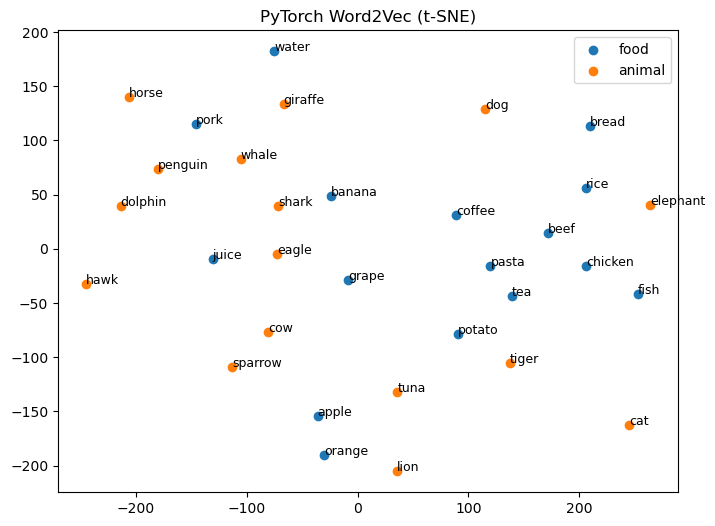

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


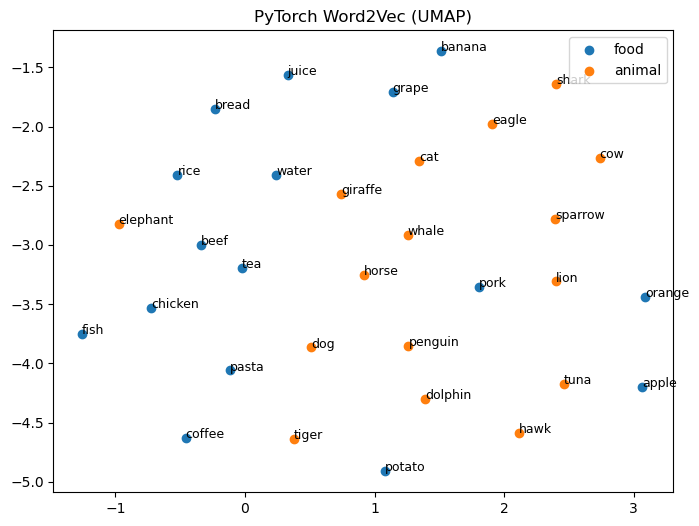

In [50]:
X, valid_words = get_embeddings_from_dict(words, embeddings, word2idx)
valid_labels = [labels[words.index(w)] for w in valid_words]

plot_tsne(X, valid_words, valid_labels, "PyTorch Word2Vec (t-SNE)")
plot_umap(X, valid_words, valid_labels, "PyTorch Word2Vec (UMAP)")

In [51]:
def get_embeddings_from_matrix(words, embeddings, word2idx):
    vectors = []
    valid_words = []

    for w in words:
        if w in word2idx:
            vectors.append(embeddings[word2idx[w]])
            valid_words.append(w)

    return np.array(vectors), valid_words


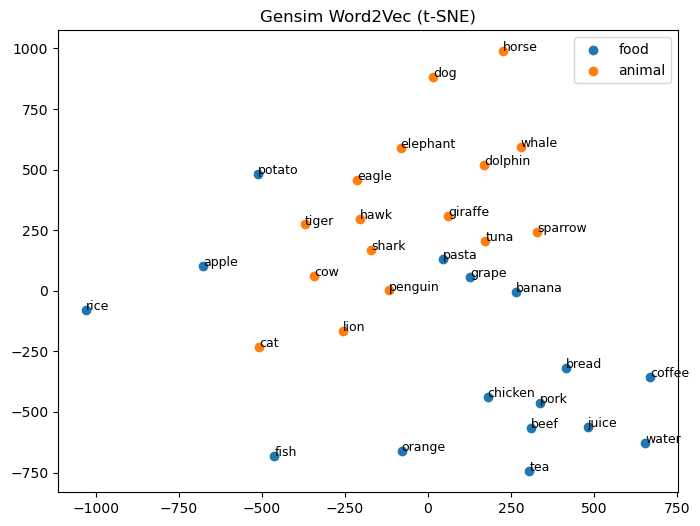

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


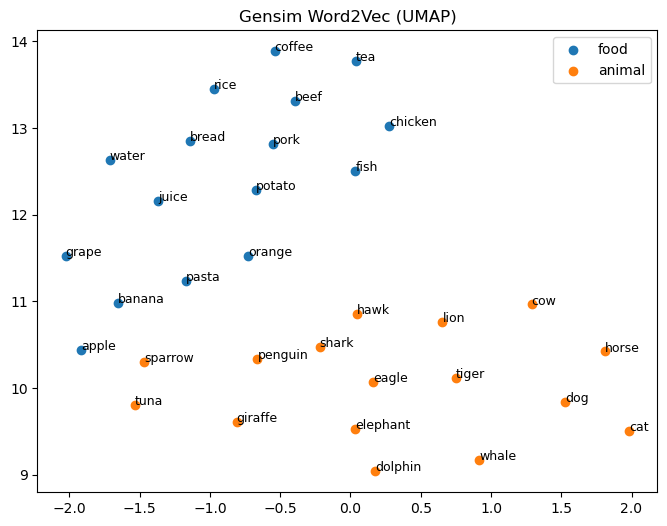

In [52]:
import pickle
import numpy as np

with open("word2vec_gensim_embeddings.pkl", "rb") as f:
    data1 = pickle.load(f)

embeddings1 = data1['embeddings']
word2idx1 = data1['word2idx']
idx2word1 = data1['idx2word']

X, valid_words = get_embeddings_from_matrix(words, embeddings1, word2idx1)
valid_labels = [labels[words.index(w)] for w in valid_words]

plot_tsne(X, valid_words, valid_labels, "Gensim Word2Vec (t-SNE)")
plot_umap(X, valid_words, valid_labels, "Gensim Word2Vec (UMAP)")


In [53]:
# Load Google News vectors
all_vectors = np.load("word2vec-google-news-300.model.vectors.npy")  # full embeddings
# Normally we'd map words to their indices in the full vocab, but we'll just slice first N for demo
word2idx = {word: i for i, word in enumerate(words)}
idx2word = {i: word for i, word in enumerate(words)}
embeddings_subset = all_vectors[:len(words)]  # slice first N embeddings for our words

# Save pickle so you can use same functions as before
with open("word2vec_google_news_subset.pkl", "wb") as f:
    pickle.dump({
        'embeddings': embeddings_subset,
        'word2idx': word2idx,
        'idx2word': idx2word
    }, f)

print("Google News subset embeddings saved.")


Google News subset embeddings saved.


In [54]:
with open("word2vec_google_news_subset.pkl", "rb") as f:
    data = pickle.load(f)

embeddings_google = data['embeddings']
word2idx_google = data['word2idx']
idx2word_google = data['idx2word']


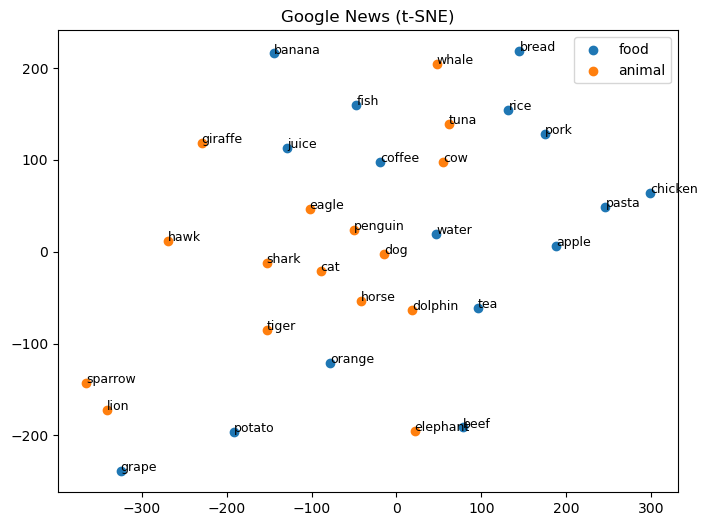

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


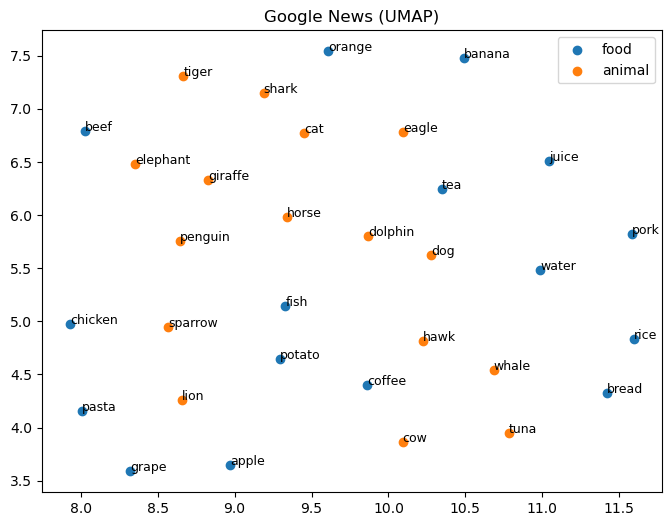

In [55]:
X, valid_words = get_embeddings_from_matrix(words, embeddings_google, word2idx_google)
valid_labels = [labels[words.index(w)] for w in valid_words]

plot_tsne(X, valid_words, valid_labels, "Google News (t-SNE)")
plot_umap(X, valid_words, valid_labels, "Google News (UMAP)")


In [56]:
# Load FastText vectors
all_vectors = np.load("fasttext-wiki-news-subwords-300.model.vectors.npy")  # full embeddings

# Map words to indices for our subset
word2idx = {word: i for i, word in enumerate(words)}
idx2word = {i: word for i, word in enumerate(words)}
embeddings_subset = all_vectors[:len(words)]  # slice first N embeddings for our words

# Save pickle for later use
with open("fasttext_wiki_news_subset.pkl", "wb") as f:
    pickle.dump({
        'embeddings': embeddings_subset,
        'word2idx': word2idx,
        'idx2word': idx2word
    }, f)

print("FastText subset embeddings saved.")


FastText subset embeddings saved.


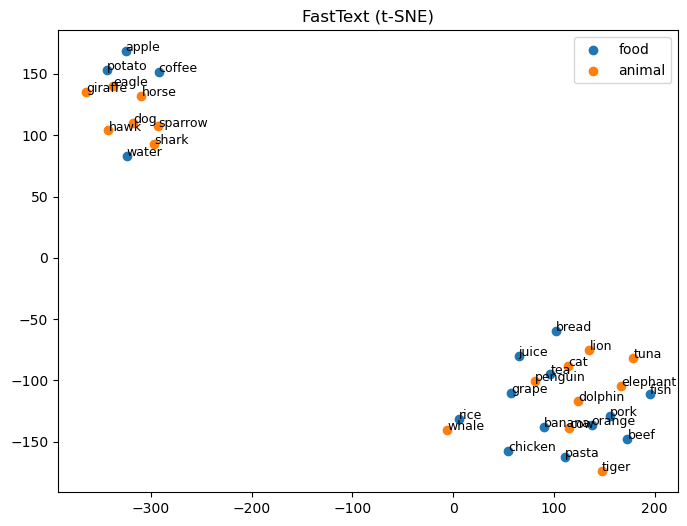

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


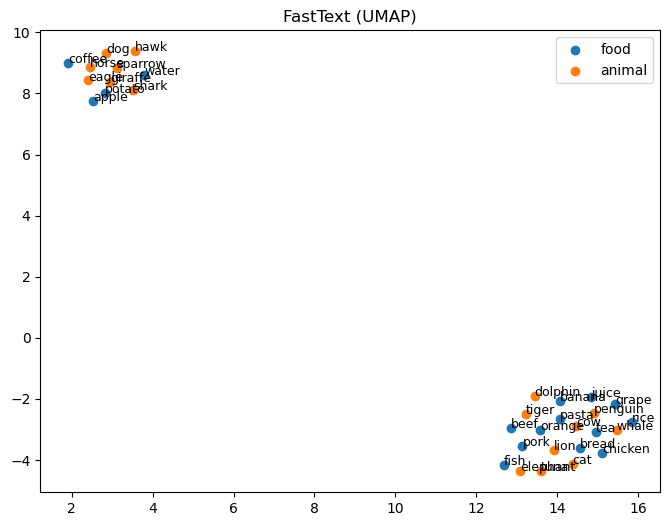

In [57]:
# Load pickle
with open("fasttext_wiki_news_subset.pkl", "rb") as f:
    data = pickle.load(f)

embeddings_fasttext = data['embeddings']
word2idx_fasttext = data['word2idx']
idx2word_fasttext = data['idx2word']

# Get embeddings for plotting
X, valid_words = get_embeddings_from_matrix(words, embeddings_fasttext, word2idx_fasttext)
valid_labels = [labels[words.index(w)] for w in valid_words]

# Plot
plot_tsne(X, valid_words, valid_labels, "FastText (t-SNE)")
plot_umap(X, valid_words, valid_labels, "FastText (UMAP)")


## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>
